# Homework 1

# A fashionable use case : clothing classification with `fashion-mnist`

- Load data with `fashion_mnist.load_data()` 
- There is no validation set, only a train and test set. 
- The labels correspond to the following things

| Label number | Label name  |
|--------------|-------------|
| 0	           | T-shirt/top |
| 1	           | Trouser     |
| 2	           | Pullover    |
| 3	           | Dress       |
| 4	           | Coat        |
| 5	           | Sandal      |
| 6	           | Shirt       |
| 7	           | Sneaker     |
| 8	           | Bag         |
| 9	           | Ankle boot  |

## Your job

- Try to understand the data, visualize it, like we did before with MNIST and noMNIST
- Create a neural network, using the ideas from before, that classify accurately the clothes on the test set
- You will need to build a validation set from the train set in order to tune hyperparameters

## We want to see the following things

- Some learning curves (training) and the accuracy obtained on the test set for the architecture you considered
- A discussion about the impact of the hyperparameters on the accuracy (size of the kernels, number of kernels, number of layers, etc.) 
- A clear comparison between your solutions (a table, or plots comparing the results obtained with different hyper-parameters and different architectures)
- An explanation of what kind of clothes are hard to distinguish and why (some visual explanation)
- You'll get a good grade if you reach a good accuracy **and** if your notebook is clean, with clear graphs and explanations of what you did **and** if you did serious comparisons between different architectures
- You can do everything on your laptop, but it might be a good idea to use google `colab` (https://colab.research.google.com/) to get free access to a GPU
- You will send your notebook **containing** the results (**WE WON'T RUN YOUR NOTEBOOK**), namely with the graphs and results that you want to show, as a **unique** jupyter notebook file (`.ipynb` extension). We won't open any other supplementary file.

## Send your work using the following google form :

- https://forms.gle/G3Rwfcuj3MZfgXhr8

(you will need to create a google account if you don't have one).

## Example of architecture

As a start, you can use the following architecture (but you can and will change it) :

- Convolutional layer with 64 filters and 5 * 5 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Convolutional layer with 128 filters and 5 * 5 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Convolutional layer with 256 filters and 3 * 3 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Dense layer with 256 units
- Dropout with probability 0.5
- Dense output layer with softmax activation

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing import image
from keras.optimizers import SGD
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_images = train_images / 255.0

test_images = test_images / 255.0

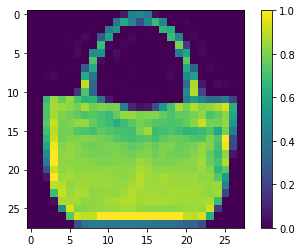

In [4]:
plt.imshow(train_images[100])
plt.colorbar()
plt.show()

#This is a bag so should be type 8

In [5]:
train_labels[100]
#it is type 8

8

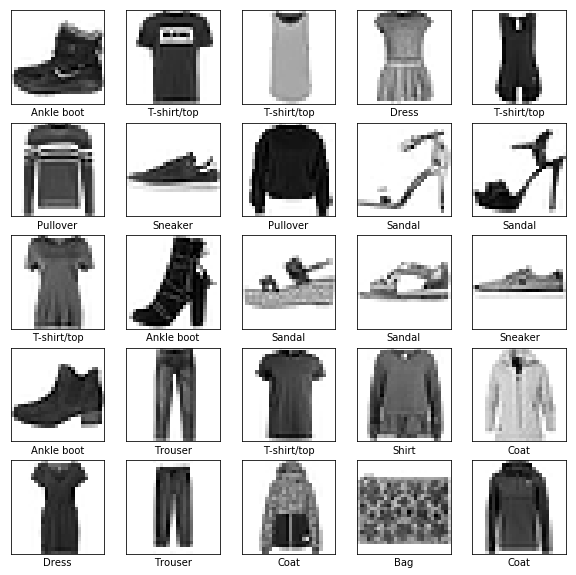

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
#Reshaping in order to get into model
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Training model

In [8]:
#trying with better model doesnt work
def model1():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
  #  model.add(Dropout(0.25))
    model.add(Flatten())
  #  model.add(Dropout(0.25))
  #  model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
   # model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [9]:
model = model1()

In [22]:
modelhistory = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1612 - accuracy: 0.9426 - val_loss: 0.1564 - val_accuracy: 0.9426
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1541 - accuracy: 0.9450 - val_loss: 0.1855 - val_accuracy: 0.9324
Epoch 3/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1475 - accuracy: 0.9475 - val_loss: 0.1665 - val_accuracy: 0.9378
Epoch 4/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.1426 - accuracy: 0.9487 - val_loss: 0.1763 - val_accuracy: 0.9349
Epoch 5/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1329 - accuracy: 0.9531 - val_loss: 0.1847 - val_accuracy: 0.9311
Epoch 6/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.1291 - accuracy: 0.9546 - val_loss: 0.1816 - val_accuracy: 0.9323
Epoch 7/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.1264 - accuracy: 0.9557 - val_loss: 0.2142 -

In [23]:
#hopefully saves model
model.save('finalmodel.h5')

# Accuracy and loss graph

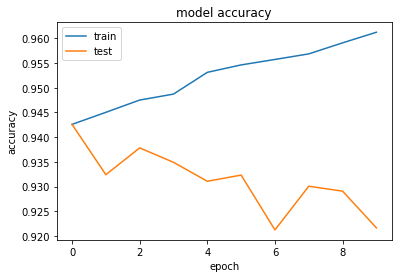

In [25]:
#only done for train set
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

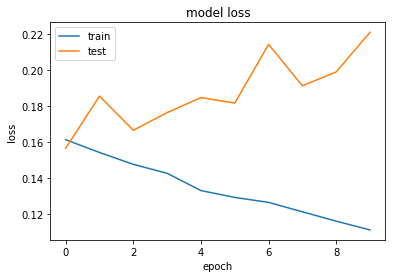

In [26]:
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Even though on the training set the accuracy is very good, on the training set it goes down which means that we have overfitted our model

# Accuracy

In [27]:
#Looking at accuracy on the test dataset

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3339 - accuracy: 0.8942

Test accuracy: 0.8942000269889832


# Predictions

In [28]:
img = test_images[300]
img = img.reshape(1, 28, 28, 1)
result =model.predict(img)
print("Label number:", np.argmax(result),"\n","Certainty:",np.max(result))

Label number: 3 
 Certainty: 0.9996599


In [29]:
test_labels[300]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [30]:
a = test_images.squeeze()
a.shape

(10000, 28, 28)